# Problem Description:
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes

# Data fields:

rec_id - Daily customer index

datetime - The date index for both years

season - Season type (1-winter, 2-spring, 3- summer, 4-fall)

year - The year ( 0-2011, 1-2012)

month - The months (1-12)

Is_holiday - 0 – not holiday, 1-holiday

weekday - Weekdays 0(Monday) – 6(Sunday)

Is_workingday - 0-not a working day, 1- workingday

weather - Weather type(1-Clear, 2- Cloudy, 3- Rian, 4- Storm

temp - Normalized value of temperatures at every rec_id

atemp - Normalized value of the absolute temperature

humidity - Contains the normalized value for the humidity

windspeed - Contains the normalized value for the windspeed

casual - Has the number of unregistered users at a given day

registered - Has the number of registered users

Total_count - Total rentals with both casual and registered users

# Importing Library 

In [288]:
# Load the necessary python libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


import warnings
warnings.filterwarnings('ignore')


# Exploratory Data Analysis(EDA)

In [289]:
# Load the dataset
dataEDA=pd.read_csv("hour.csv")

Checking the sturcture of data

In [290]:
dataEDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Inference :

Dataset has 730 rows and 16 columns.

Except one dteday column, all other are either float or integer type.

We will analyse the categorical variables and onvert them to as required.

In [ ]:
# Checking for null values is the data

In [291]:
dataEDA.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in the dataset

In [292]:
df_trainEx, df_test =train_test_split(dataEDA , test_size = 0.2 , random_state=42)

In [293]:
# Rename column 
df_trainEx = dataEDA.rename(columns = {'instant':'rec_id', 'dteday':'datetime','weathersit':'weather', 'cnt':'total_count', 'dteday':'datetime','mnth':'month','temp':'temperature','holiday':'is_holiday', 'workingday':'is_workingday','hum':'humidity','yr':'year'})





In [294]:
#check duplicate
dataEDA.duplicated().sum()

0

# Identifying the outliers:

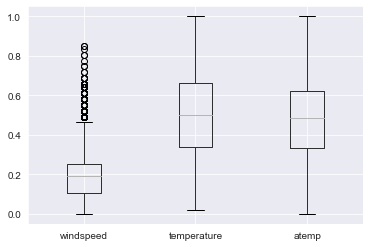

In [295]:
boxplot = df_trainEx.boxplot(column=['windspeed','temperature','atemp'])

In [296]:
Outlier_col= df_trainEx[[ 'windspeed','temperature','atemp']]

In [297]:
Q1 = df_trainEx.quantile(0.25)
Q3 = df_trainEx.quantile(0.75)

In [298]:
IQR = Q3 - Q1
df_trainEx =df_trainEx[~((df_trainEx < (Q1 - 1.5 * IQR)) |(df_trainEx > (Q3 + 1.5 * IQR))).any(axis=1)]

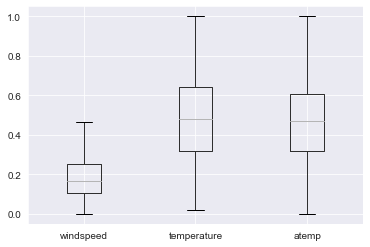

In [299]:
sns.set_palette("RdBu_r")
boxplot = df_trainEx.boxplot(column=['windspeed','temperature','atemp'])

Looking at the data, there seems to be some fields that are categorical in nature, but is integer/float type.
Converting the below mentioned categorical variables to object datatype by mapping

season

year

weather

weekday

is_holiday

is_workingday

In [300]:
#change value in each column 
df_trainEx['season'] = df_trainEx['season'].map({1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'})
df_trainEx['year'] = df_trainEx['year'].map({0:'2011', 1:'2012'})
df_trainEx['is_holiday'] = df_trainEx['is_holiday'].map({0:'No', 1:'Yes'})
df_trainEx['weekday'] = df_trainEx['weekday'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
df_trainEx['is_workingday'] = df_trainEx['is_workingday'].map({0:'No', 1:'Yes'})
df_trainEx['weather'] = df_trainEx['weather'].map({1:'Clear', 2:'Cloudy', 3:'Rain', 4:'Storm'})




In [301]:
df_trainEx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14799 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rec_id         14799 non-null  int64  
 1   datetime       14799 non-null  object 
 2   season         14799 non-null  object 
 3   year           14799 non-null  object 
 4   month          14799 non-null  int64  
 5   hr             14799 non-null  int64  
 6   is_holiday     14799 non-null  object 
 7   weekday        14799 non-null  object 
 8   is_workingday  14799 non-null  object 
 9   weather        14799 non-null  object 
 10  temperature    14799 non-null  float64
 11  atemp          14799 non-null  float64
 12  humidity       14799 non-null  float64
 13  windspeed      14799 non-null  float64
 14  casual         14799 non-null  int64  
 15  registered     14799 non-null  int64  
 16  total_count    14799 non-null  int64  
dtypes: float64(4), int64(6), object(7)
memory usage: 2

In [302]:
df_trainEx.head()

,rec_id,datetime,season,year,month,hr,is_holiday,weekday,is_workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Winter,2011,1,0,No,Sunday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,1,1,No,Sunday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,1,2,No,Sunday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,1,3,No,Sunday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,1,4,No,Sunday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [303]:
df_trainEx.sample(5)

,rec_id,datetime,season,year,month,hr,is_holiday,weekday,is_workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total_count
9261,9262,2012-01-26,Winter,2012,1,19,No,Friday,Yes,Cloudy,0.40,0.4091,0.76,0.1045,11,302,313
2654,2655,2011-04-25,Spring,2011,4,12,No,Tuesday,Yes,Clear,0.66,0.6212,0.74,0.2537,48,140,188
8885,8886,2012-01-11,Winter,2012,1,2,No,Thursday,Yes,Clear,0.20,0.2121,0.85,0.1642,0,5,5
4852,4853,2011-07-26,Summer,2011,7,2,No,Wednesday,Yes,Clear,0.68,0.6364,0.89,0.1045,1,6,7
1703,1704,2011-03-16,Winter,2011,3,15,No,Thursday,Yes,Cloudy,0.40,0.4091,0.76,0.2537,22,79,101


In [304]:
df_trainEx.describe()

,rec_id,month,hr,temperature,atemp,humidity,windspeed,casual,registered,total_count
count,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000
mean,8429.853639,6.511318,11.165890,0.483410,0.464407,0.644950,0.180161,23.769647,125.060342,148.829989
std,5021.788339,3.496449,7.152273,0.190873,0.170517,0.188672,0.111812,26.523112,113.946827,131.380486
min,1.000000,1.000000,0.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4096.500000,3.000000,5.000000,0.320000,0.318200,0.500000,0.104500,3.000000,28.000000,33.000000
50%,8245.000000,7.000000,11.000000,0.480000,0.469700,0.650000,0.164200,13.000000,100.000000,120.000000
75%,12743.500000,10.000000,18.000000,0.640000,0.606100,0.810000,0.253700,37.000000,186.000000,229.000000
max,17379.000000,12.000000,23.000000,1.000000,1.000000,1.000000,0.462700,114.000000,499.000000,594.000000


# To get the types of weather in our dataset:

In [305]:
df_trainEx.weather.unique()

array(['Clear', 'Cloudy', 'Rain'], dtype=object)

# To get the types of season in our dataset:

In [306]:
df_trainEx.season.value_counts()

Winter    3783
Summer    3735
Fall      3649
Spring    3632
Name: season, dtype: int64

# To get the types of year in our dataset:

In [307]:
df_trainEx.year.unique()

array(['2011', '2012'], dtype=object)

In [308]:
df_trainEx.year.value_counts()

2011    7770
2012    7029
Name: year, dtype: int64

# To get the types of weekday in our dataset:

In [258]:
df_trainEx.weekday.unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [259]:
df_trainEx.weekday.value_counts()

Thursday     2252
Saturday     2237
Wednesday    2233
Friday       2207
Monday       1995
Tuesday      1946
Sunday       1929
Name: weekday, dtype: int64

# To get the types of holiday in our dataset:

In [260]:
df_trainEx.is_holiday.unique()

array(['No'], dtype=object)

# To get the types of month in our dataset:

In [261]:
df_trainEx.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

# Data Visualisation

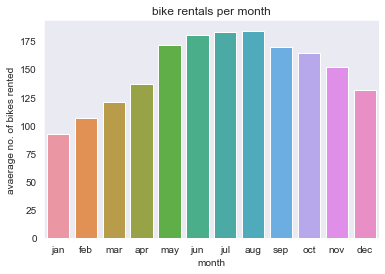

In [262]:
months = 'jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec'.split(',')
ax = sns.barplot('month', 'total_count', data=df_trainEx, estimator=np.mean, ci=None)
ax.set_ylabel('avaerage no. of bikes rented')
ax.set_xlabel('month')
ax.set_xticklabels(months)
sns.set_style("dark")
plt.title('bike rentals per month')

plt.show()

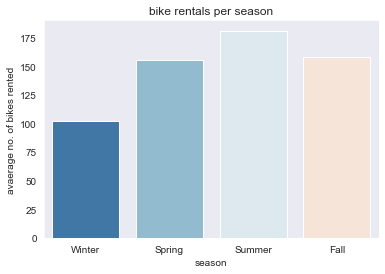

In [309]:
#season = 'Springer,Summer,Fall,Winter'.split(',')
ax = sns.barplot('season', 'total_count', data=df_trainEx, estimator=np.mean, ci=None)
ax.set_ylabel('avaerage no. of bikes rented')
ax.set_xlabel('season')
#ax.set_xticklabels(season)
sns.set_style("dark")
plt.title('bike rentals per season')

plt.show()


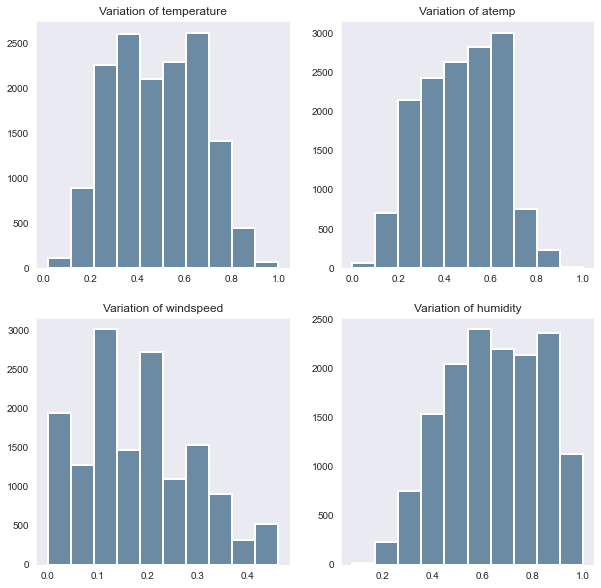

In [310]:
df_trainEx.temperature.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temperature",data=df_trainEx,linewidth=2,color='xkcd:gray blue')
axes[0,0].set_title("Variation of temperature")
axes[0,1].hist(x="atemp",data=df_trainEx,linewidth=2,color='xkcd:gray blue')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=df_trainEx,linewidth=2,color='xkcd:gray blue')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=df_trainEx,linewidth=2,color='xkcd:gray blue')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

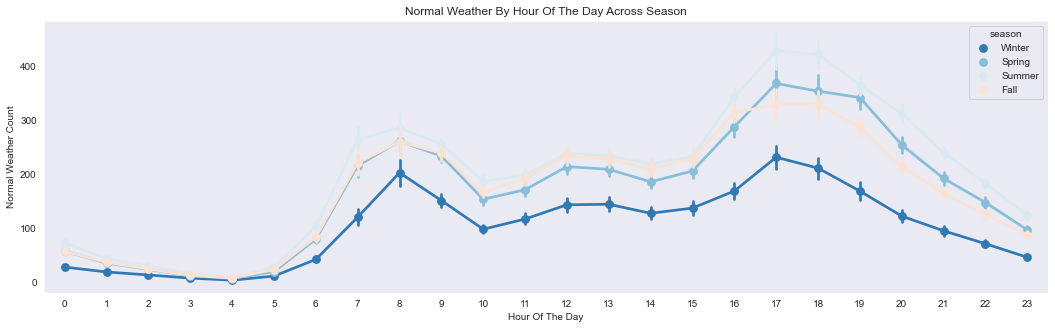

In [312]:
fig, ax = plt.subplots(figsize=(18, 5))
#seasons = ['spring', 'summer', 'fall', 'winter']
#ax.set_xticklabels(seasons)
sns.set_style("dark")

sns.pointplot(x=df_trainEx["hr"], y=df_trainEx["total_count"], hue=df_trainEx["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Normal Weather Count', title="Normal Weather By Hour Of The Day Across Season");


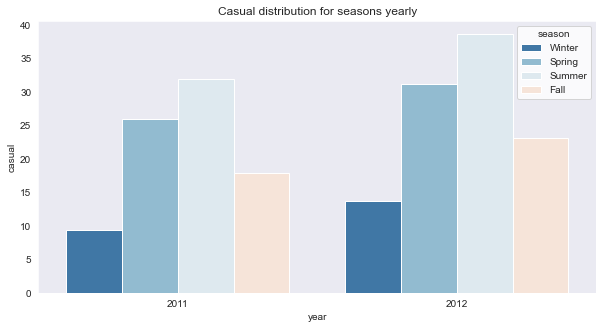

In [313]:
fig,ax=plt.subplots(figsize=(10,5))
sns.set_style('white')
sns.barplot(x='year',y='casual',data=df_trainEx,hue='season',ax=ax,ci=None)
sns.set_style("dark")


Years = '2011,2012'.split(',')
ax.set_xticklabels(Years)
ax.set_title('Casual distribution for seasons yearly')
plt.show()

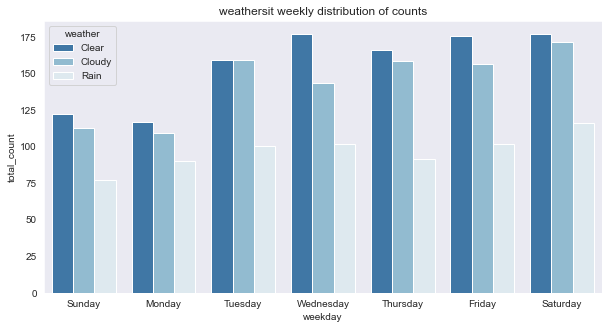

In [318]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='weekday',y='total_count',data=df_trainEx,hue='weather',ax=ax,ci=None)
ax.set_title('weathersit weekly distribution of counts')
sns.set_style("ticks")
#sns.set_palette("RdBu_r")

#fig.patch.set_facecolor('EBEAF2')

plt.show()

ValueError: 'label' must be of length 'x'

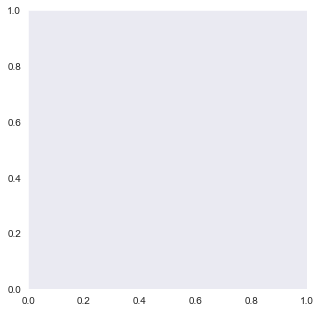

In [319]:
plt.figure(figsize=(5, 6))

labels = 'Clear', 'Cloudy', 'Rain', 'Storm'
sizes = df_trainEx.total_count.groupby(df_trainEx.weather).sum().tolist()
sns.set_style("dark")


colors = ['lavender', 'steelblue', 'linen', 'silver']
explode = (0.2, 0, 0, 0.5)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=60)
plt.axis('equal')
plt.title('Bike usage based on weather')
plt.show()


In [320]:
data=df_trainEx.drop(['rec_id','datetime','casual','registered','month', 'is_holiday','weekday','is_workingday', 'atemp','hr'], axis=1)






 Visualising numerical variables through pairplot

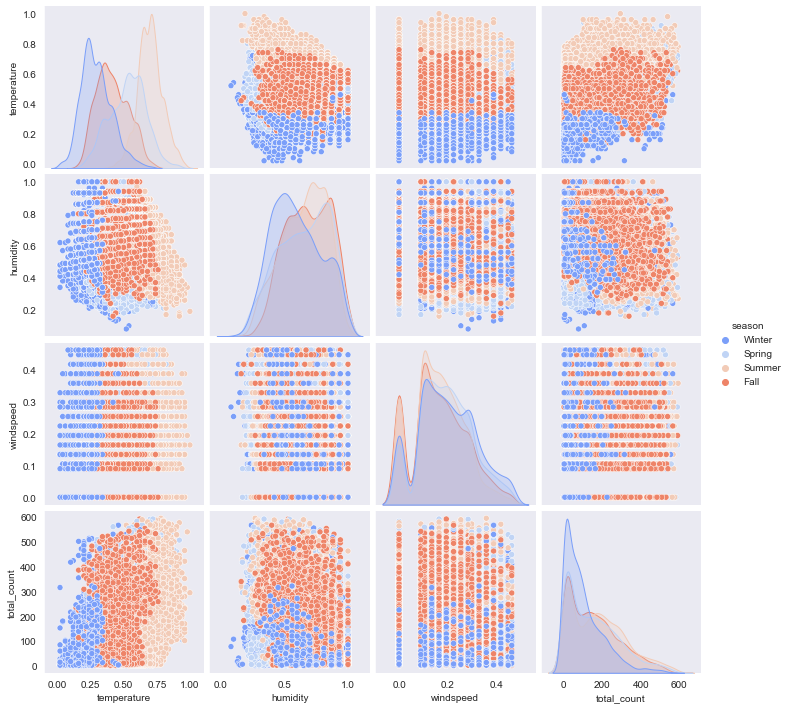

In [321]:
sns.set_style("dark")


sns.pairplot(data,hue='season',palette='coolwarm');



In [322]:
data['windspeed']=data['windspeed'].replace(0, np.nan)
data['temperature']=data['temperature'].replace(0, np.nan)
data['humidity']=data['humidity'].replace(0, np.nan)


imp = KNNImputer(n_neighbors=5)



NameError: name 'KNNImputer' is not defined

In [ ]:
data=data.dropna(subset=['windspeed', 'temperature','humidity'])

In [ ]:
data.info()

In [ ]:
sns.set_style("dark")


sns.pairplot(data,hue='season',palette='coolwarm');

In [ ]:
plt.subplots(figsize=(15,10))
sns.heatmap(df_trainEx.corr(), annot=True, cmap='coolwarm');

In [ ]:
data=pd.read_csv("hour.csv")
data.info()

In [ ]:


data = data.rename(columns = {'instant':'rec_id', 'dteday':'datetime','weathersit':'weather', 'cnt':'total_count', 'dteday':'datetime','mnth':'month','temp':'temperature','holiday':'is_holiday', 'workingday':'is_workingday','hum':'humidity','yr':'year'})


data.info()

In [ ]:
categoricalFeatureNames = ["season","is_holiday","is_workingday","weather","weekday","month","year","hr"]
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

In [ ]:
data.columns

In [ ]:
data.info()

In [ ]:
data['windspeed']=data['windspeed'].replace(0, np.nan)
data['humidity']=data['humidity'].replace(0, np.nan)
data.isna().sum()

In [ ]:
data=data.dropna(subset=['windspeed','humidity'])

In [ ]:
data1=data

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)


In [ ]:
data.dropna(inplace=True)

In [ ]:
data = pd.concat([data, pd.get_dummies(data['Season'], prefix='Season',drop_first=True)],axis=1)
data = pd.concat([data, pd.get_dummies(data['hr'], prefix='hr',drop_first=True)],axis=1)


data= data.drop(["Season","hr"],axis=1)

In [ ]:
X, y = data.drop(['datetime','rec_id','total_count','casual', 'atemp','registered','weekday','is_holiday'],axis=1), data['total_count']


In [ ]:
X.shape

In [323]:
# Splitting the dataset into the Training set and Test set
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=42)


In [324]:
X.columns

Index(['year', 'month', 'is_workingday', 'weather', 'temperature', 'humidity',
       'windspeed', 'season_2', 'season_3', 'season_4', 'hr_1', 'hr_2', 'hr_3',
       'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11',
       'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19',
       'hr_20', 'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [325]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.01)

#Feature transforms for train, val, and test so that we can run our poly model on each
lasso_model = Lasso(alpha = 0.01)
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [326]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lasso_model.fit(X_train_scaled, y_train)
print(f'Lasso Regression val R^2: {lasso_model.score(X_val_scaled, y_val):.3f}')



lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.665
Ridge Regression val R^2: 0.665
Lasso Regression val R^2: 0.665
Degree 2 polynomial regression val R^2: 0.881


In [327]:
selected_columns = ['year', 'month', 'weekday', 'is_workingday', 'weather',
       'temperature', 'humidity', 'windspeed','hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7',
       'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15',
       'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23',
       'season_2', 'season_3', 'season_4', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23' ]

In [328]:
list(zip(selected_columns, lasso_model.coef_))


[('year', 41.5151734311612),
 ('month', -2.507248947315485),
 ('weekday', 3.7694304706648816),
 ('is_workingday', -13.47286857542378),
 ('weather', 49.34561954394636),
 ('temperature', -18.393117306922147),
 ('humidity', -8.085278621085255),
 ('windspeed', 18.330651941339386),
 ('hr_1', 13.809903331937557),
 ('hr_2', 31.214599246483903),
 ('hr_3', -2.608153505054885),
 ('hr_4', -5.134867702089232),
 ('hr_5', -6.511298086109896),
 ('hr_6', -7.608373791789795),
 ('hr_7', -4.346128154802178),
 ('hr_8', 6.539068922558032),
 ('hr_9', 35.31589451645016),
 ('hr_10', 53.59182787965584),
 ('hr_11', 32.85215023398636),
 ('hr_12', 20.50211737106731),
 ('hr_13', 28.164351214792365),
 ('hr_14', 34.92987832602663),
 ('hr_15', 32.876088606504595),
 ('hr_16', 30.410891962926712),
 ('hr_17', 31.886294566941224),
 ('hr_18', 45.013869650212214),
 ('hr_19', 78.38399450570607),
 ('hr_20', 68.96202207202481),
 ('hr_21', 47.20283313428223),
 ('hr_22', 30.84038115303676),
 ('hr_23', 21.32503342653935),
 ('sea

In [329]:
i=[('polynomial',PolynomialFeatures(degree=2),'modal',LinearRegression())]

In [330]:
preds = np.poly1d(np.polyfit(X_test))

TypeError: _polyfit_dispatcher() missing 2 required positional arguments: 'y' and 'deg'

In [331]:
sns.jointplot(x=preds,y=y_test, kind='reg');

NameError: name 'preds' is not defined

In [332]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.677
